In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
df=pd.read_csv("/content/email.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [10]:
df.shape

(5573, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [13]:
df["Category"].unique()

array(['ham', 'spam', '{"mode":"full"'], dtype=object)

<Axes: xlabel='Category', ylabel='count'>

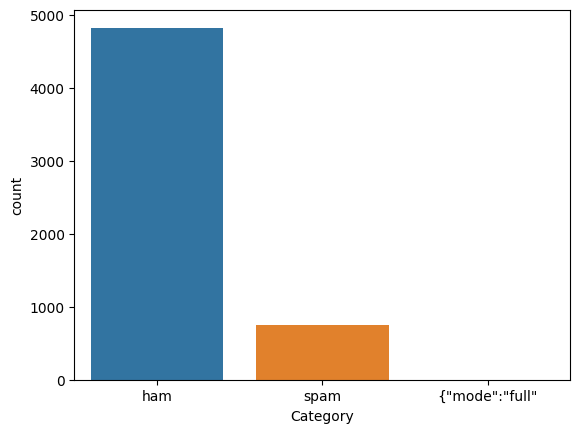

In [18]:
sns.countplot(x="Category",data=df,hue="Category")

**There are nearly 4900 datas as "Ham" - e-mail that is not Spam
nearly 1000 datas as "Spam" - e-mail that is Spam**

In [26]:
df=df.loc[df["Category"]!='{"mode":"full"',:]

In [27]:
df.shape

(5572, 2)

**The imbalanced data to prevent the model from being biased towards the majority class - used "SMOTE" technique.**

In [29]:
x=df["Message"]
y=df["Category"]

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=26)


In [53]:
smote=SMOTE()

In [34]:
vectorizer=TfidfVectorizer()  # TF-IDF (Term Frequency-Inverse Document Frequency)- to convert text into numerical vectors based on the importance of words


In [54]:
x_train_tfidf=vectorizer.fit_transform(x_train)

In [55]:
x_train_resample,y_train_resample=smote.fit_resample(x_train_tfidf,y_train)

<ipython-input-50-e58d6a7c8f66>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')
<ipython-input-50-e58d6a7c8f66>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resample, palette='viridis')


Text(0.5, 1.0, 'After SMOTE')

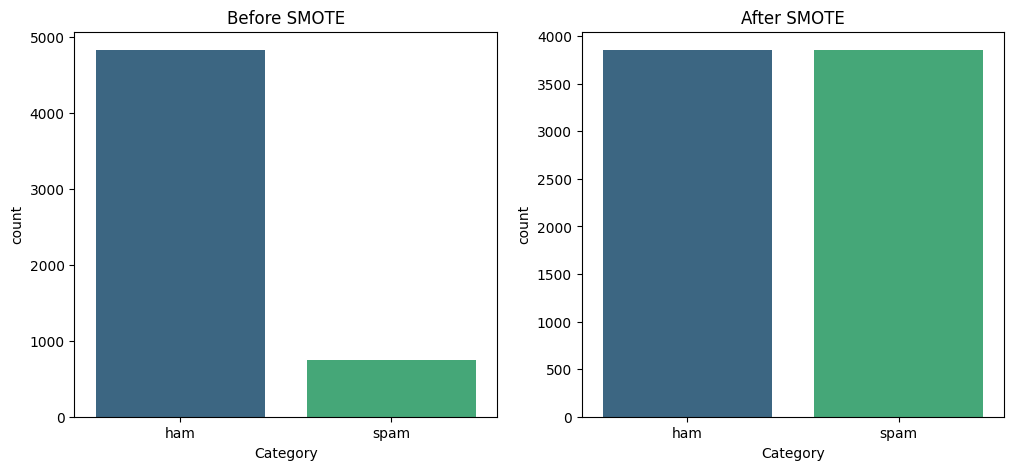

In [50]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x=y,palette='viridis')
plt.title('Before SMOTE')

plt.subplot(1,2,2)
sns.countplot(x=y_train_resample,palette='viridis')
plt.title('After SMOTE')


In [56]:
model=LogisticRegression()

In [58]:
model.fit(x_train_resample,y_train_resample)

LogisticRegression()

In [59]:
x_test_tfidf =vectorizer.transform(x_test)

In [60]:
y_pred=model.predict(x_test_tfidf)

In [61]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.989237668161435


In [62]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       970
        spam       0.98      0.94      0.96       145

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



Text(70.72222222222221, 0.5, 'True Label')

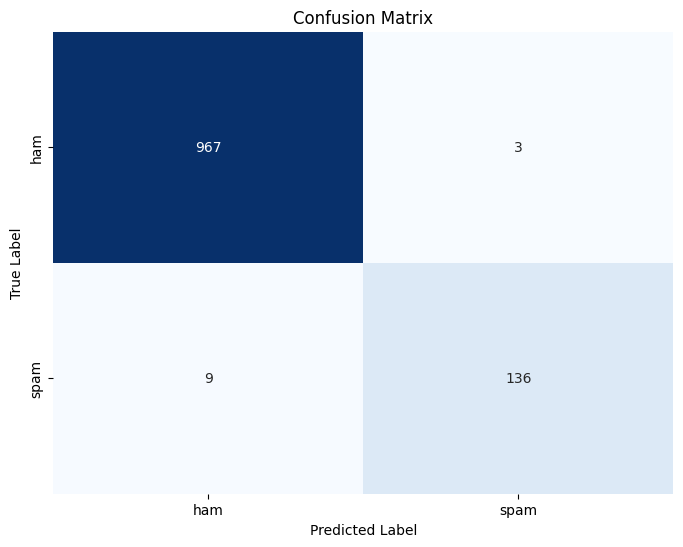

In [65]:
conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False,
            xticklabels=model.classes_,yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

**"The model has correctly predicted 967 instances as 'Ham' and 136 instances as 'Spam.' However, it incorrectly predicted 3 instances as 'Spam' and 9 instances as 'Ham.'"**

In [68]:
# Testing the model with custom input
new_email = 'Dear friend, I have a great investment opportunity for you!'
new_email_vectorized = vectorizer.transform([new_email])
prediction = model.predict(new_email_vectorized)
print('Prediction:', prediction)

Prediction: ['ham']


In [69]:
# Testing the model with custom input
new_email = 'Congratulations! You have won a free vacation! Click here to claim your prize.'
new_email_vectorized = vectorizer.transform([new_email])
prediction = model.predict(new_email_vectorized)
print('Prediction:', prediction)

Prediction: ['spam']
